In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha for Bonferroni Correction
alpha =  0.003/30

# zTest Function
# requires original dataframe (df), group 1 (df1), group2 (df2), variable to be tested (column), alpha for confidence intervals (alpha)
def zTest(df,df1,df2,column, alpha):
    #use stats models ztests on the two groups
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    # print if the means are significantly different
    if p<= alpha:
        print('***The Groups Have Different Means***')
    
    # print probability of groups sharing a mean
    print('Probablility They Have Same Mean: ', round(p,5))
    
    # print confidence interval
    t = smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha)
    print('Range of True Difference in Means: (',round(t[0],3),':', round(t[1],3),')')

# list diffence function that returns items in first list that are not in second list 
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]


In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')

# create dictionary to change binary categorical output variable to an integer
dic={'Sale':1.0,'No Sale':0.0}

# convert categorical output variable to binary
df['ResultOfTour']=df['ResultOfTour'].replace(dic)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 146456 to 381090
Data columns (total 11 columns):
Age                           14445 non-null int64
AgentLine                     14445 non-null object
BookingWindow                 14445 non-null object
FirstGenVsOwner               14445 non-null object
HHIncomeRanges                14445 non-null object
Homeowner                     14445 non-null object
InState                       14445 non-null object
Programs (Budget)             14445 non-null object
relationStatus                14445 non-null object
ResultOfTour                  14445 non-null float64
NetVolumePlusNonGoodVolume    14445 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB
None


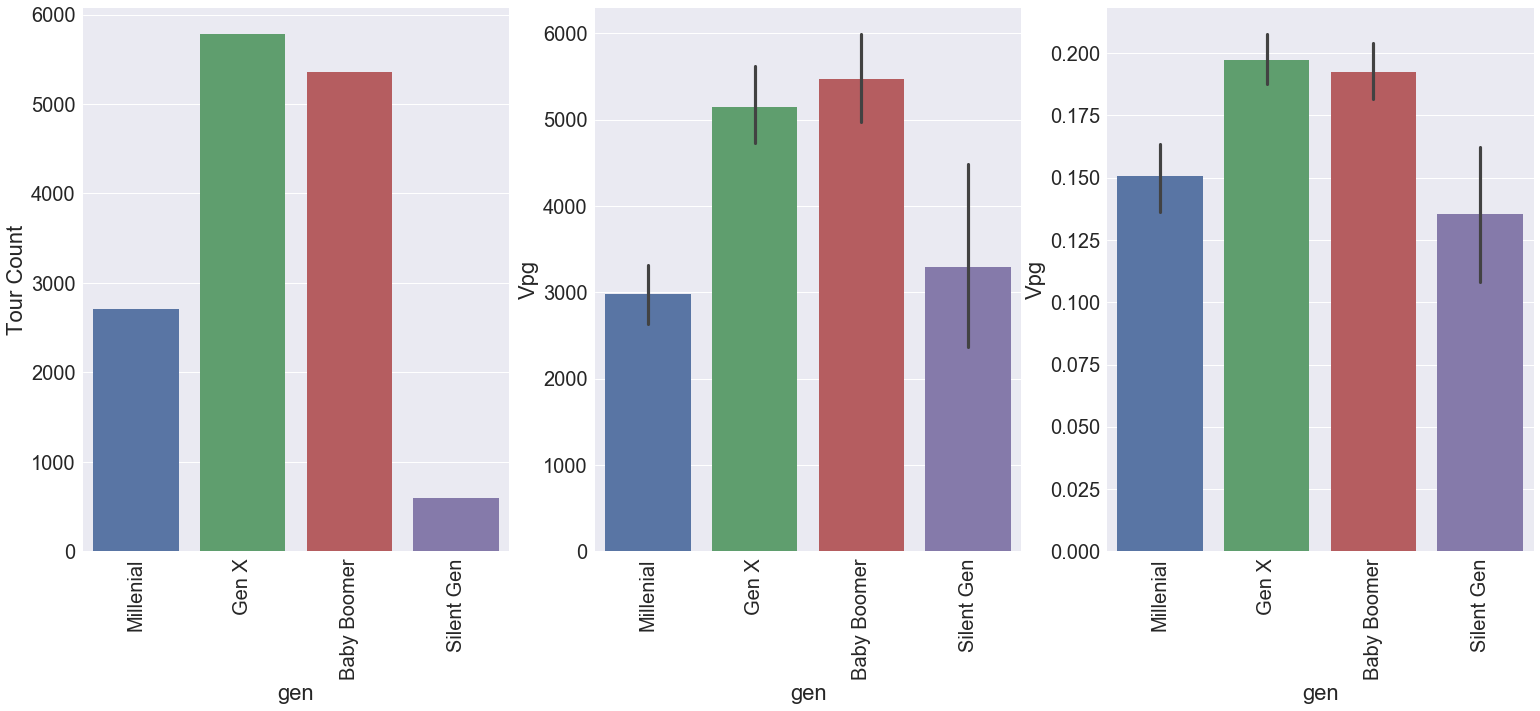

Millenials vs Other Generations Differences in VPG:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3601.767 : -832.375 )

Millenials vs Other Generations Differences in Close Rate:
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -0.073 : -0.009 )

---------------------------------------------------------------------
Gen X vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.03417
Range of True Difference in Means: ( -502.949 : 1704.143 )

Gen X vs Other Generations Differences in Close Rate:
Probablility They Have Same Mean:  0.00094
Range of True Difference in Means: ( -0.004 : 0.047 )

---------------------------------------------------------------------
Baby Boomers vs Other Generations Differences in VPG:
Probablility They Have Same Mean:  0.00015
Range of True Difference in Means: ( -31.021 : 2206.739 )

Baby Boomers vs Othe

In [5]:
# creat generation bins
age_dic = dict([(n, 'Millenial')for n in range(20, 38)] +
[(n, 'Gen X')for n in range(38, 54)] +
[(n, 'Baby Boomer')for n in range(54, 73)] +
[(n, 'Silent Gen')for n in range(73, 91)])
df['gen'] = df.Age.replace(age_dic)

#increase  figure size
mpl.rcParams['figure.figsize'] = (26,10)
sns.set(font_scale = 2)

#create countplot of number of tours for each generation
plt.subplot(1,3,1)
sns.countplot(x= 'gen',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by generation
plt.subplot(1,3,2)
sns.barplot(x= 'gen',y= 'NetVolumePlusNonGoodVolume',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Vpg')

#create barplot of close rate by generation
plt.subplot(1,3,3)
sns.barplot(x= 'gen',y= 'ResultOfTour',data=df, order = ['Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'])
plt.xticks(rotation=90)
plt.ylabel('Vpg')
plt.show()

#create millenial and non millenial groups
dfMillenials = df[df.Age < 38]
dfNotMillenials = df[df.Age >= 38]

#compare millenial and non millenial groups with z test
print('Millenials vs Other Generations Differences in VPG:')
zTest(df,dfMillenials,dfNotMillenials, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Millenials vs Other Generations Differences in Close Rate:')
zTest(df,dfMillenials,dfNotMillenials, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#create genx and non genx groups with z test
dfGenX = df[(df.Age >= 38) & (df.Age < 54 )]
dfNotGenX = df[(df.Age < 38) | (df.Age >= 54)]

#compare genx and non genx groups
print('Gen X vs Other Generations Differences in VPG:')
zTest(df,dfGenX,dfNotGenX, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Gen X vs Other Generations Differences in Close Rate:')
zTest(df,dfGenX,dfNotGenX, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Baby Boomer and non Baby Boomer groups
dfBB = df[(df.Age >= 54) & (df.Age < 73 )]
dfNotBB = df[(df.Age < 54) | (df.Age >= 73)]

# compare Baby Boomer and non Baby Boomer groups with z test
print('Baby Boomers vs Other Generations Differences in VPG:')
zTest(df,dfBB,dfNotBB, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Baby Boomers vs Other Generations Differences in Close Rate:')
zTest(df,dfBB,dfNotBB, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Silent Gen and non Silent Gen groups
dfSG = df[(df.Age >= 73) ]
dfNotSG = df[(df.Age < 73)]

# compare Silent Gen and non Silent Gen groups with z test
print('Silent Gen vs Other Generations Differences in VPG:')
zTest(df,dfSG,dfNotSG, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Silent Gen vs Other Generations Differences in Close Rate:')
zTest(df,dfSG,dfNotSG, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

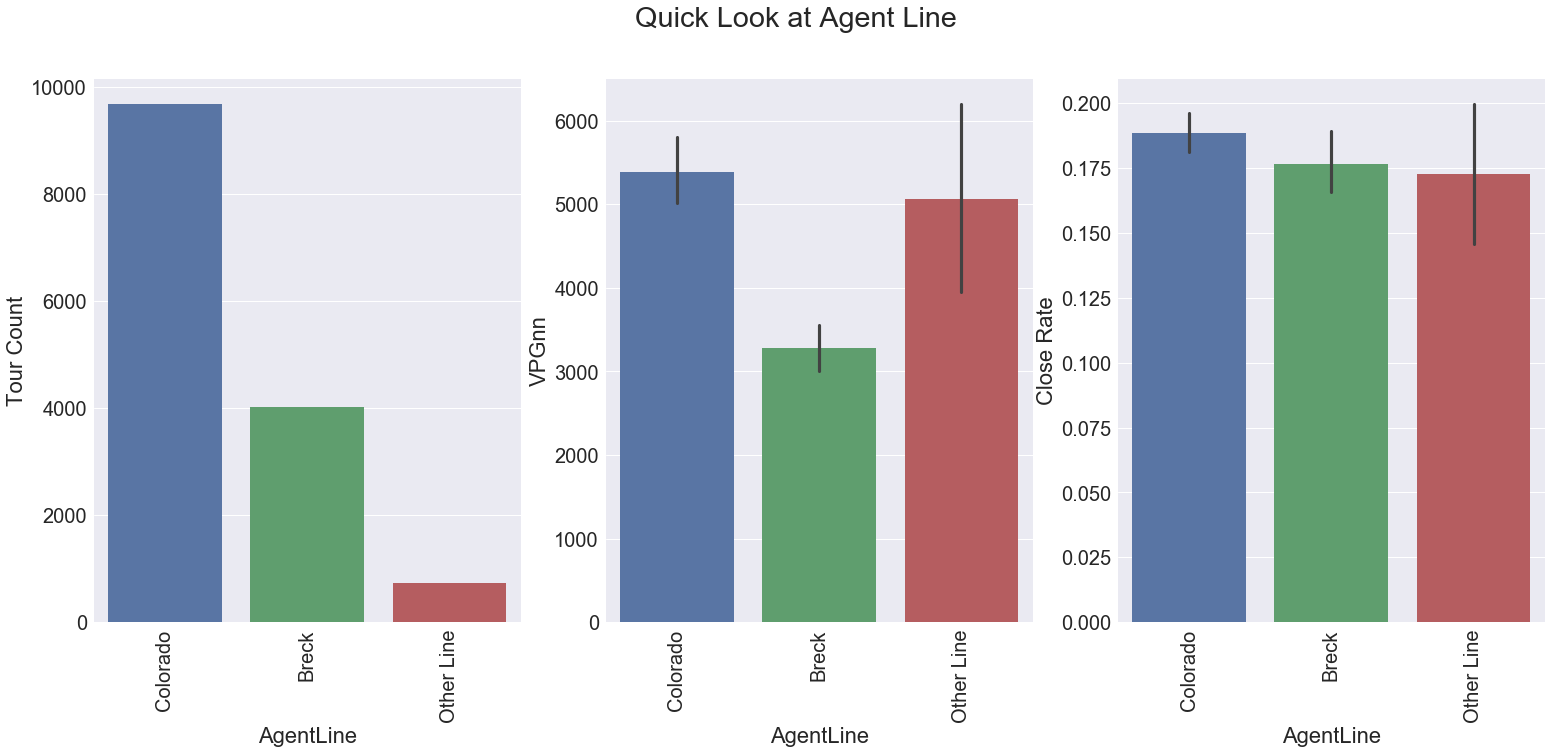

Colorado vs Breck and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 684.494 : 2981.486 )

Colorado vs Breck and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.06767
Range of True Difference in Means: ( -0.014 : 0.039 )

---------------------------------------------------------------------
Breck vs Colorado and Other Lines Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3290.608 : -882.23 )

Breck vs Colorado and Other Lines Differences in Close Rate
Probablility They Have Same Mean:  0.13415
Range of True Difference in Means: ( -0.039 : 0.017 )
---------------------------------------------------------------------


In [6]:
# create countplot of tours by agent line
plt.subplot(1,3,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by agent line
plt.subplot(1,3,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by agent line
plt.subplot(1,3,3)
sns.barplot(x= 'AgentLine', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Agent Line')
plt.show()

# create Colorado Line and Other Line groups
dfColorado = df[df.AgentLine == 'Colorado']
dfNotColorado = df[(df.AgentLine == 'Breck') | (df.AgentLine == 'Other Line')]

# compare Colorado Line and Other Line groups with z tests
print('Colorado vs Breck and Other Lines Differences in VPG')
zTest(df,dfColorado,dfNotColorado, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Colorado vs Breck and Other Lines Differences in Close Rate')
zTest(df,dfColorado,dfNotColorado, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

# create Breck Line and Other Line groups
dfBreck = df[df.AgentLine == 'Breck']
dfNotBreck = df[(df.AgentLine == 'Colorado') | (df.AgentLine == 'Other Line')]

# compare Breck Line and Other Line groups with z tests
print('Breck vs Colorado and Other Lines Differences in VPG')
zTest(df,dfBreck,dfNotBreck, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Breck vs Colorado and Other Lines Differences in Close Rate')
zTest(df,dfBreck,dfNotBreck, 'ResultOfTour', alpha)
print('---------------------------------------------------------------------')

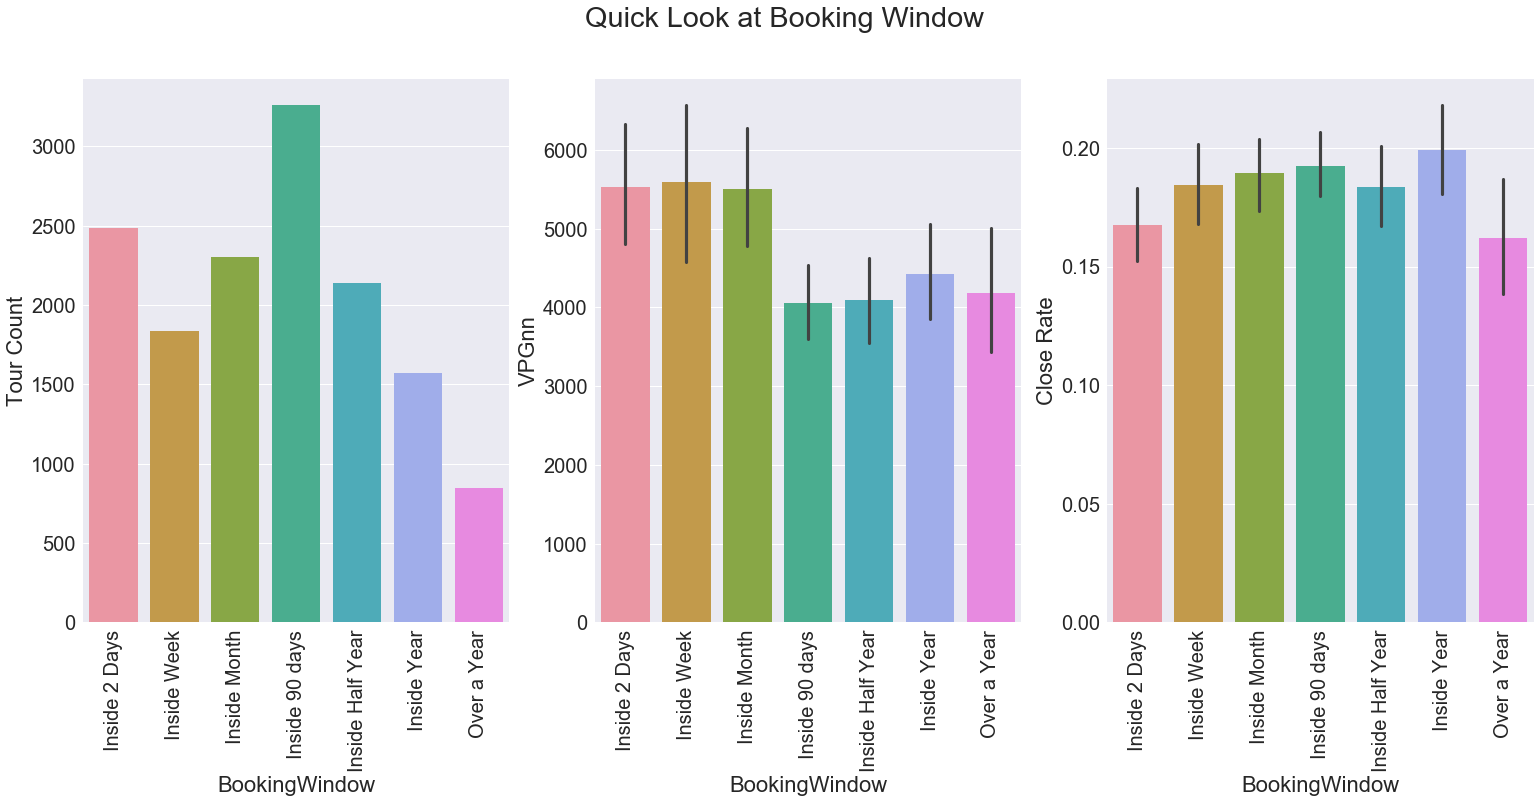

Booked Inside a Week vs Booked Ouside a Week Differences in VPG
Probablility They Have Same Mean:  0.0003
Range of True Difference in Means: ( -83.063 : 2278.12 )

Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate
Probablility They Have Same Mean:  0.05188
Range of True Difference in Means: ( -0.041 : 0.014 )

---------------------------------------------------------------------
Booked Inside a Month vs Booked Ouside a Month Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 298.577 : 2467.614 )

Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate
Probablility They Have Same Mean:  0.20359
Range of True Difference in Means: ( -0.033 : 0.017 )

---------------------------------------------------------------------
Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG
Probablility They Have Same Mean:  0.00579
Range of True Difference in Means: ( -338.458

In [7]:
# create countplot of tour count by booking window
plt.subplot(1,3,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

# create barplot for vpg by booking window
plt.subplot(1,3,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

# create barplot for close rate by booking window
plt.subplot(1,3,3)
sns.barplot(x= 'BookingWindow',y = 'ResultOfTour', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Booking Window')
plt.show()

#Booked within a week Versus booked outside a week z test
dfInsideWeek = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')]
dfOutsideWeek = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')|(df.BookingWindow == 'Inside Month')]

print('Booked Inside a Week vs Booked Ouside a Week Differences in VPG')
zTest(df,dfInsideWeek,dfOutsideWeek, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Week vs Booked Ouside a Week Differences in Close Rate')
zTest(df,dfInsideWeek,dfOutsideWeek, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within a month Versus booked outside a month z test
dfInsideMonth = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')]
dfOutsideMonth = df[(df.BookingWindow == 'Inside 90 days')|(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

print('Booked Inside a Month vs Booked Ouside a Month Differences in VPG')
zTest(df,dfInsideMonth,dfOutsideMonth, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside a Month vs Booked Ouside a Month Differences in Close Rate')
zTest(df,dfInsideMonth,dfOutsideMonth, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

#Booked within 90 days Versus booked outside 90 days z test
dfInside90 = df[(df.BookingWindow == 'Inside 2 Days')|(df.BookingWindow == 'Inside Week')|(df.BookingWindow == 'Inside Month')|(df.BookingWindow == 'Inside 90 days')]
dfOutside90 = df[(df.BookingWindow == 'Inside Half Year')|(df.BookingWindow == 'Inside Year')|(df.BookingWindow == 'Over a Year')]

print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in VPG')
zTest(df,dfInside90,dfOutside90, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Booked Inside 90 Days vs Booked Ouside 90 days Differences in Close Rate')
zTest(df,dfInside90,dfOutside90, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

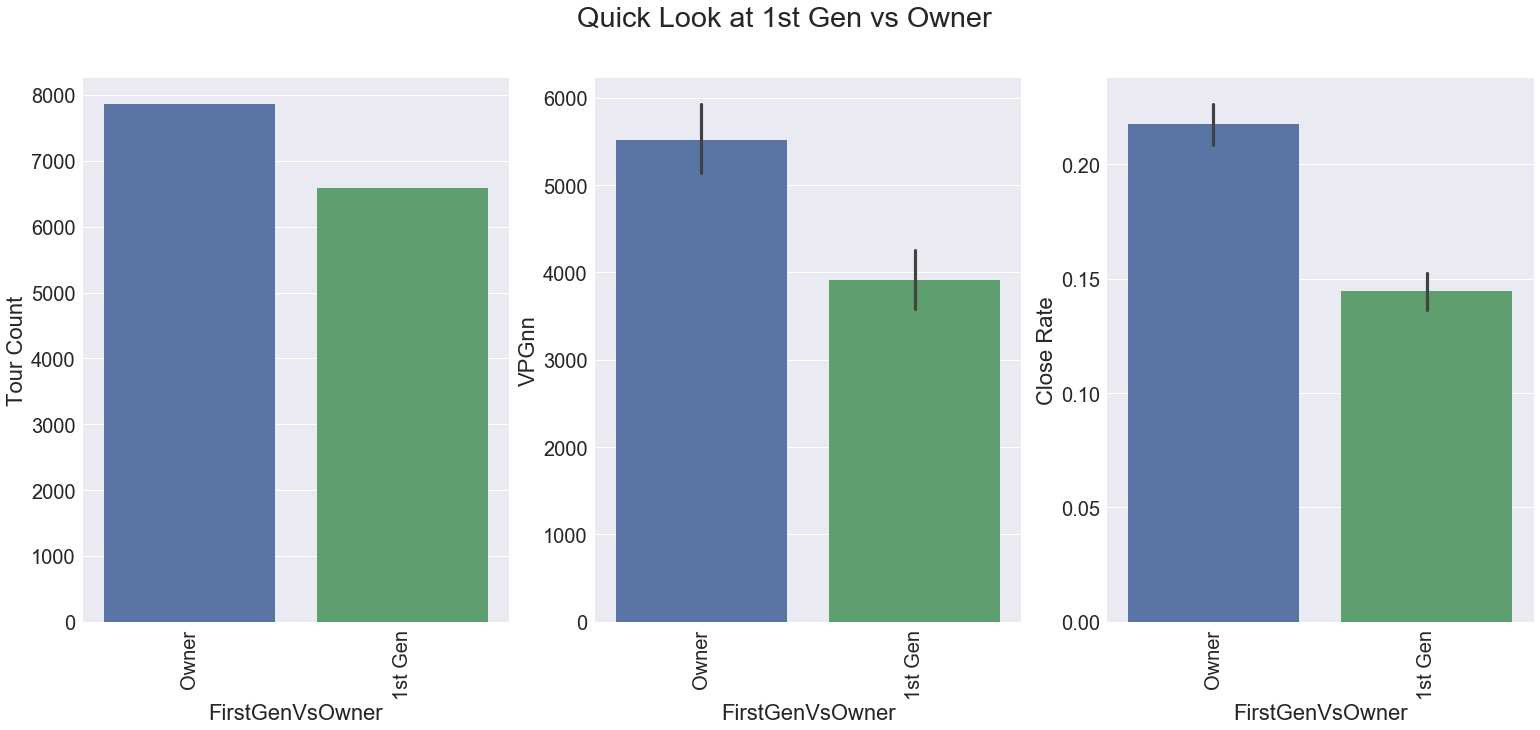

Owner Versus First Gen True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 526.684 : 2696.1 )

Owner Versus First Gen True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.048 : 0.098 )

---------------------------------------------------------------------


In [8]:
# create countplot of tour count by first gen vs owner
plt.subplot(1,3,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)

# create barplot of vpg by first gen vs owner
plt.subplot(1,3,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

# create barplot of close rate by first gen vs owner
plt.subplot(1,3,3)
sns.barplot(x= 'FirstGenVsOwner',y = 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in VPG')
zTest(df,dfOwner,dfFirstGen, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Owner Versus First Gen True Difference in Close Rate')
zTest(df,dfOwner,dfFirstGen, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

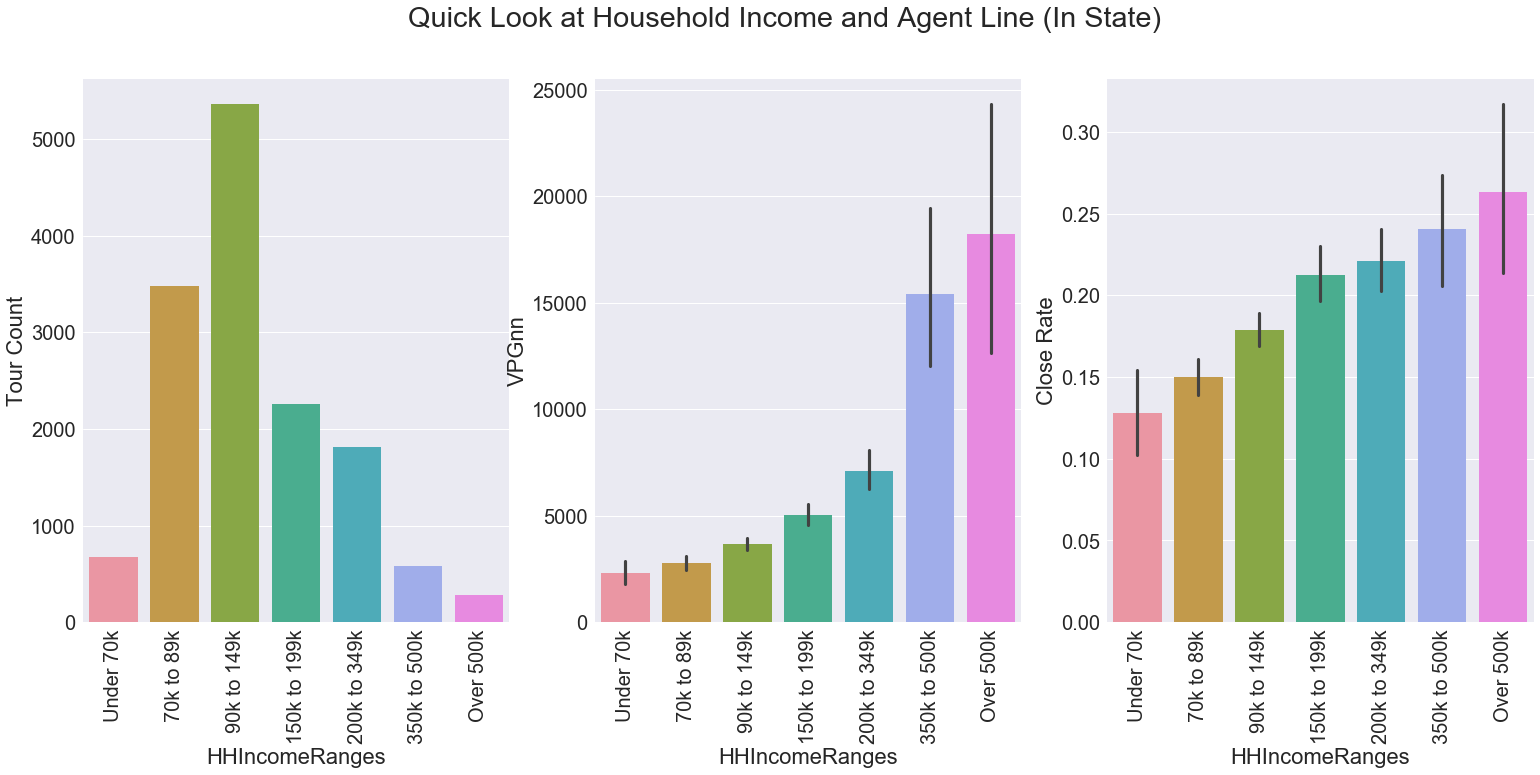

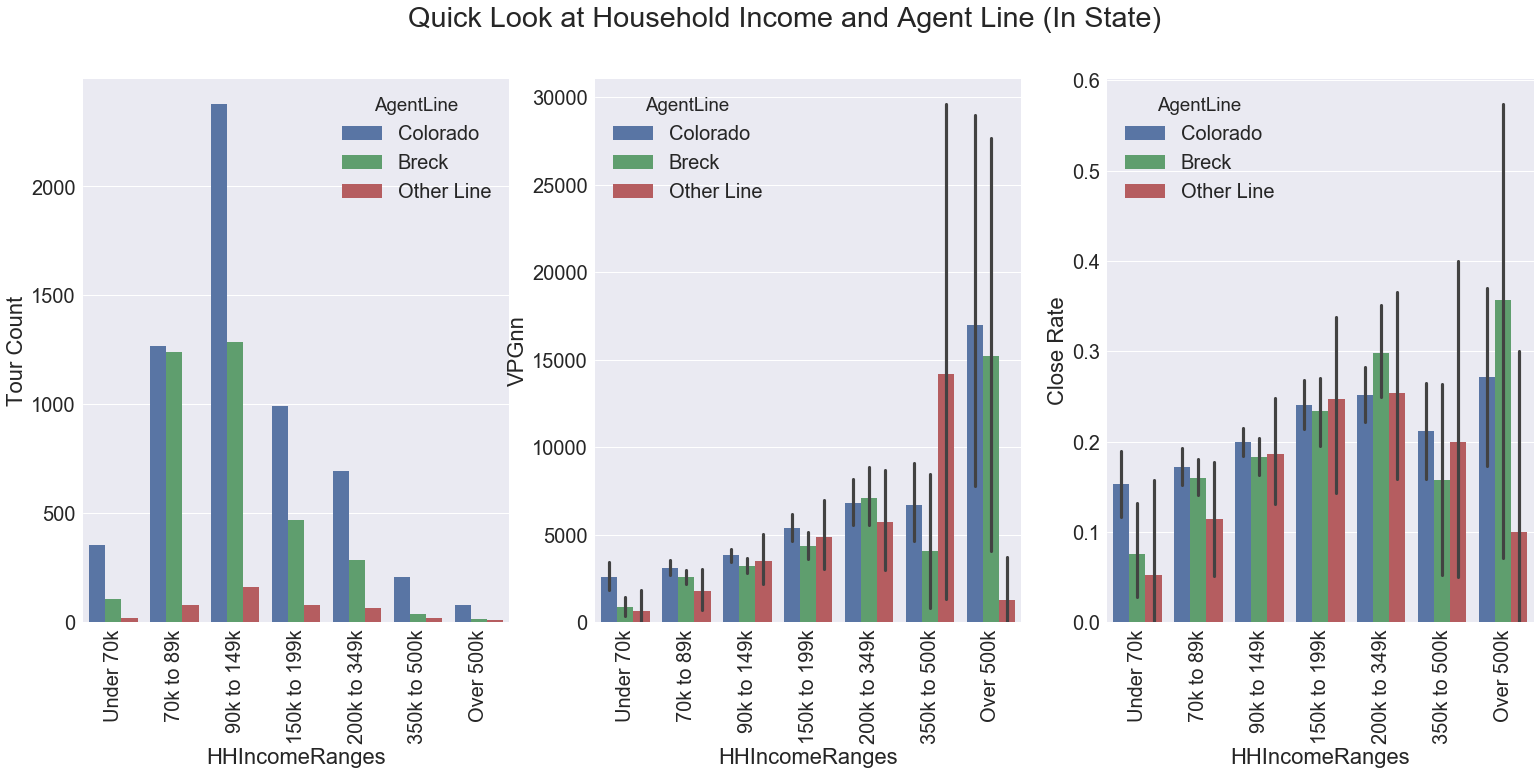

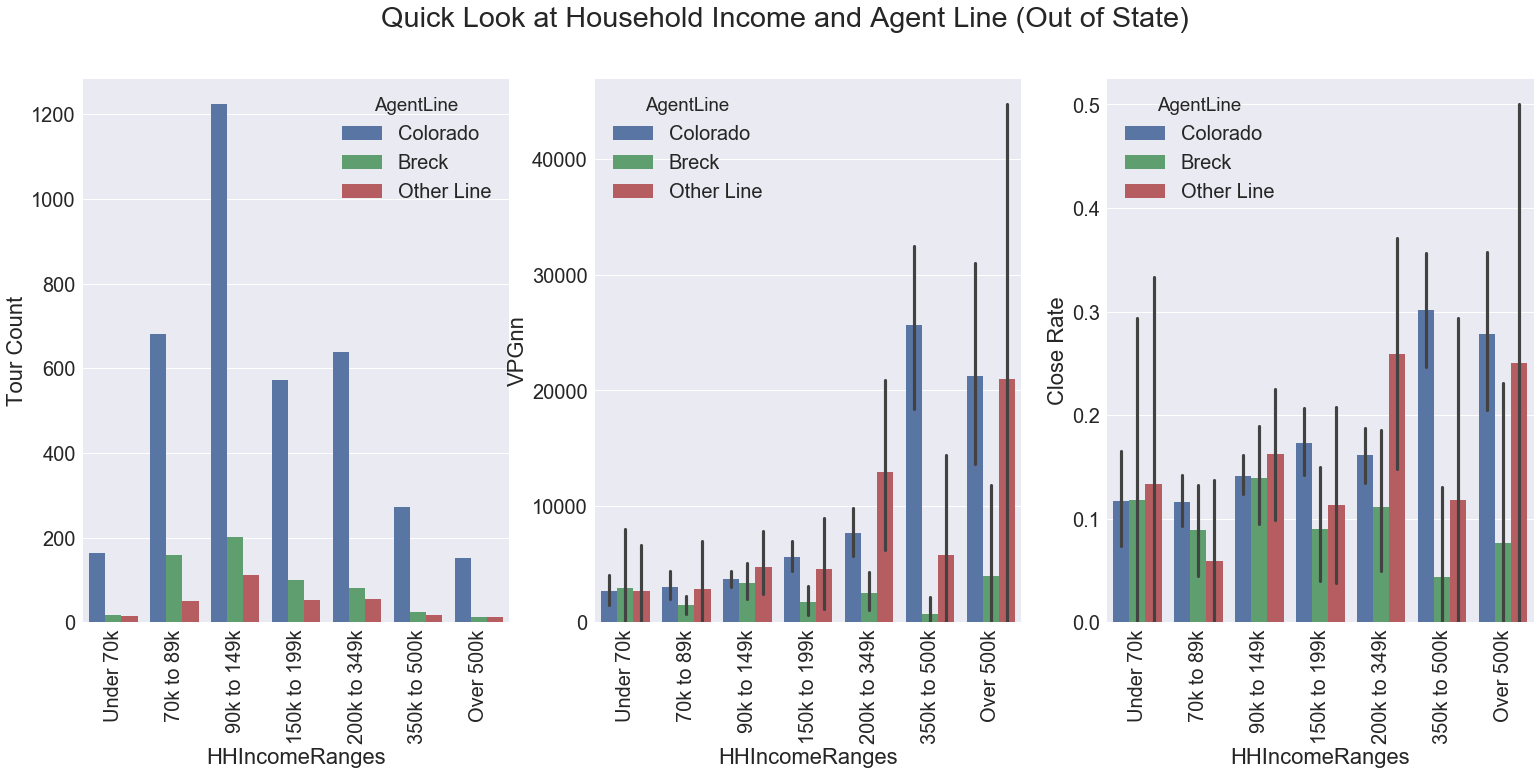

HHI over 350k vs HHI Under 350k Differences in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 10033.585 : 14537.684 )

HHI over 350k vs HHI Under 350k Differences in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.015 : 0.121 )

---------------------------------------------------------------------


In [9]:
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and Agent Line (In State)')
plt.show()

# Instate
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df[df.InState == 'In State'],hue = 'AgentLine', order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume',hue = 'AgentLine', data = df[df.InState == 'In State'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour',hue = 'AgentLine', data = df[df.InState == 'In State'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and Agent Line (In State)')
plt.show()


# Out of state
#create countplot of tour count for HHIRanges
plt.subplot(1,3,1)
sns.countplot(x= 'HHIncomeRanges', data = df[df.InState == 'Out of State'],hue = 'AgentLine', order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')

#create barplot of vpg by HHIRanges
plt.subplot(1,3,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume',hue = 'AgentLine', data = df[df.InState == 'Out of State'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')

#create barplot of close rate by HHIRanges
plt.subplot(1,3,3)
sns.barplot(x='HHIncomeRanges',y ='ResultOfTour',hue = 'AgentLine', data = df[df.InState == 'Out of State'], order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Household Income and Agent Line (Out of State)')
plt.show()

#HHI over 350 Versus HHI Under 350 days z test
dfNotHHI350 = df[(df.HHIncomeRanges == 'Under 70k')|(df.HHIncomeRanges == '70k to 89k')|(df.HHIncomeRanges == '90k to 149k')|(df.HHIncomeRanges == '150k to 199k')|(df.HHIncomeRanges == '200k to 349k')]
dfHHI350 = df[(df.HHIncomeRanges == '350k to 500k')|(df.HHIncomeRanges == 'Over 500k')]
print('HHI over 350k vs HHI Under 350k Differences in VPG')
zTest(df,dfHHI350,dfNotHHI350, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('HHI over 350k vs HHI Under 350k Differences in Close Rate')
zTest(df,dfHHI350,dfNotHHI350, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

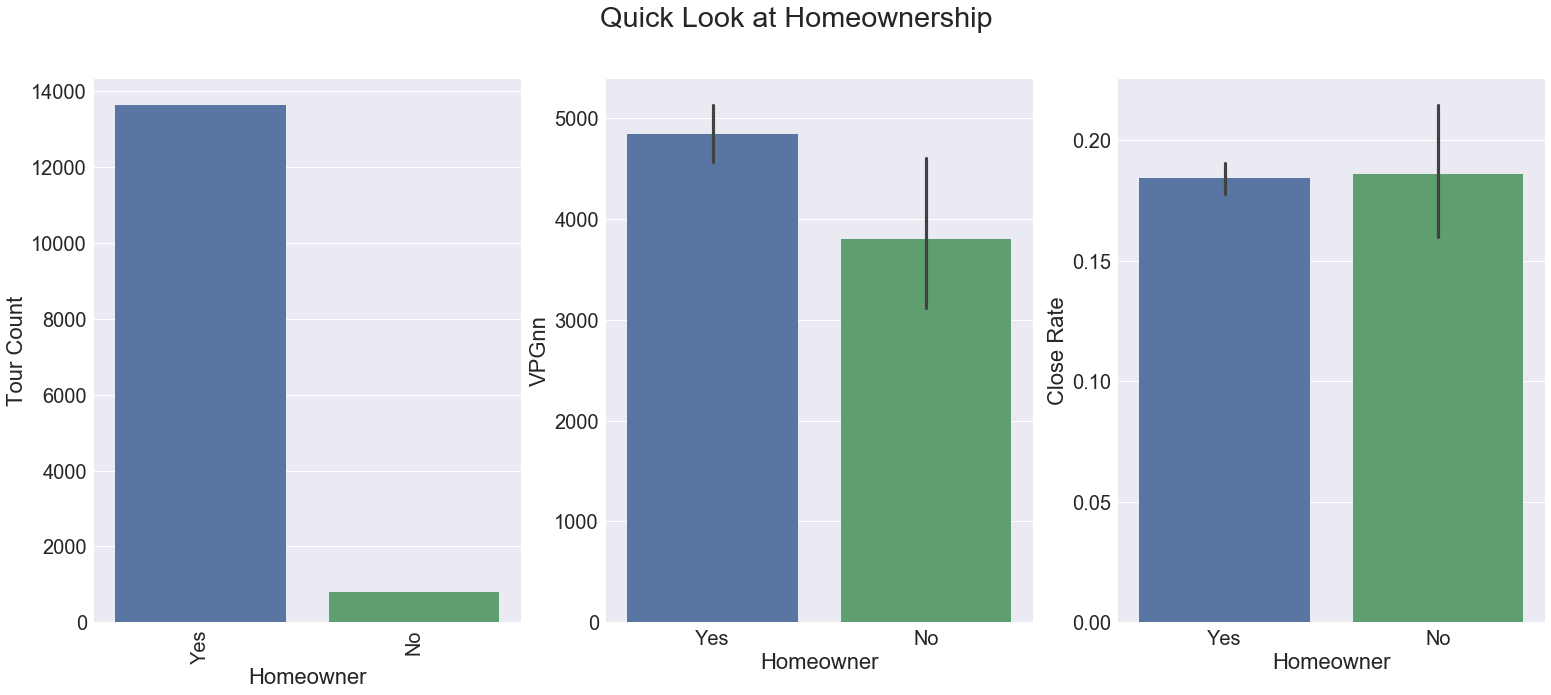

Homeowner Versus Non Homeowner True Difference in VPG
Probablility They Have Same Mean:  0.0845
Range of True Difference in Means: ( -1315.48 : 3410.495 )

Homeowner Versus Non Homeowner True Difference in Close Rate
Probablility They Have Same Mean:  0.89649
Range of True Difference in Means: ( -0.057 : 0.053 )

---------------------------------------------------------------------


In [10]:
plt.subplot(1,3,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= df)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(y= 'ResultOfTour', x='Homeowner', data= df)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHY,dfHN, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Homeowner Versus Non Homeowner True Difference in Close Rate')
zTest(df,dfHY,dfHN, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

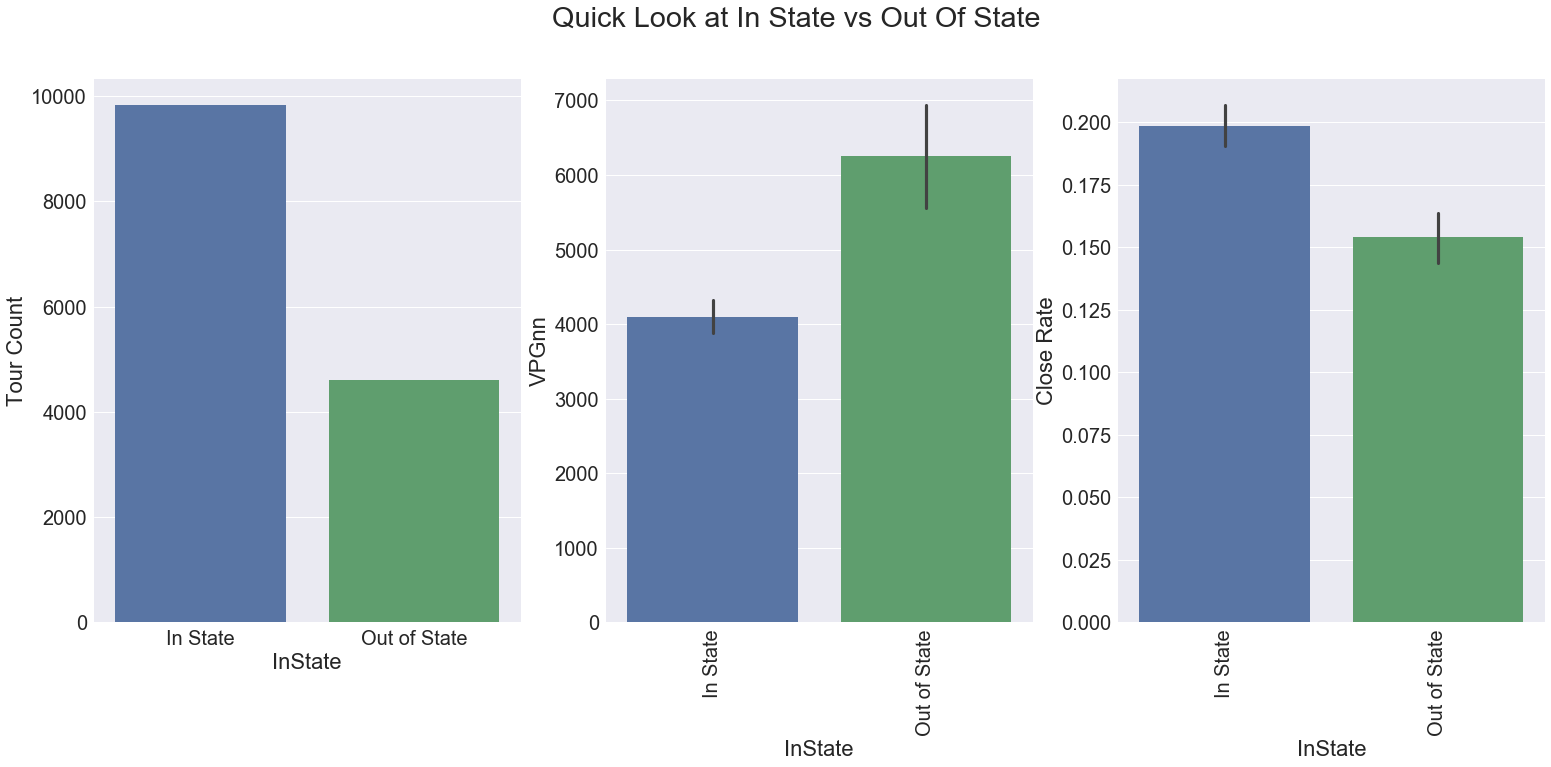

In State Versus Out of State True Difference in VPG
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( -3316.367 : -999.521 )

In State Versus Out of State True Difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.018 : 0.071 )

---------------------------------------------------------------------


In [11]:
# instate quick look
plt.subplot(1,3,1)
sns.countplot(x= 'InState', data = df)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'InState', y='ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

print('In State Versus Out of State True Difference in VPG')
zTest(df,dfIn,dfOut, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('In State Versus Out of State True Difference in Close Rate')
zTest(df,dfIn,dfOut, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

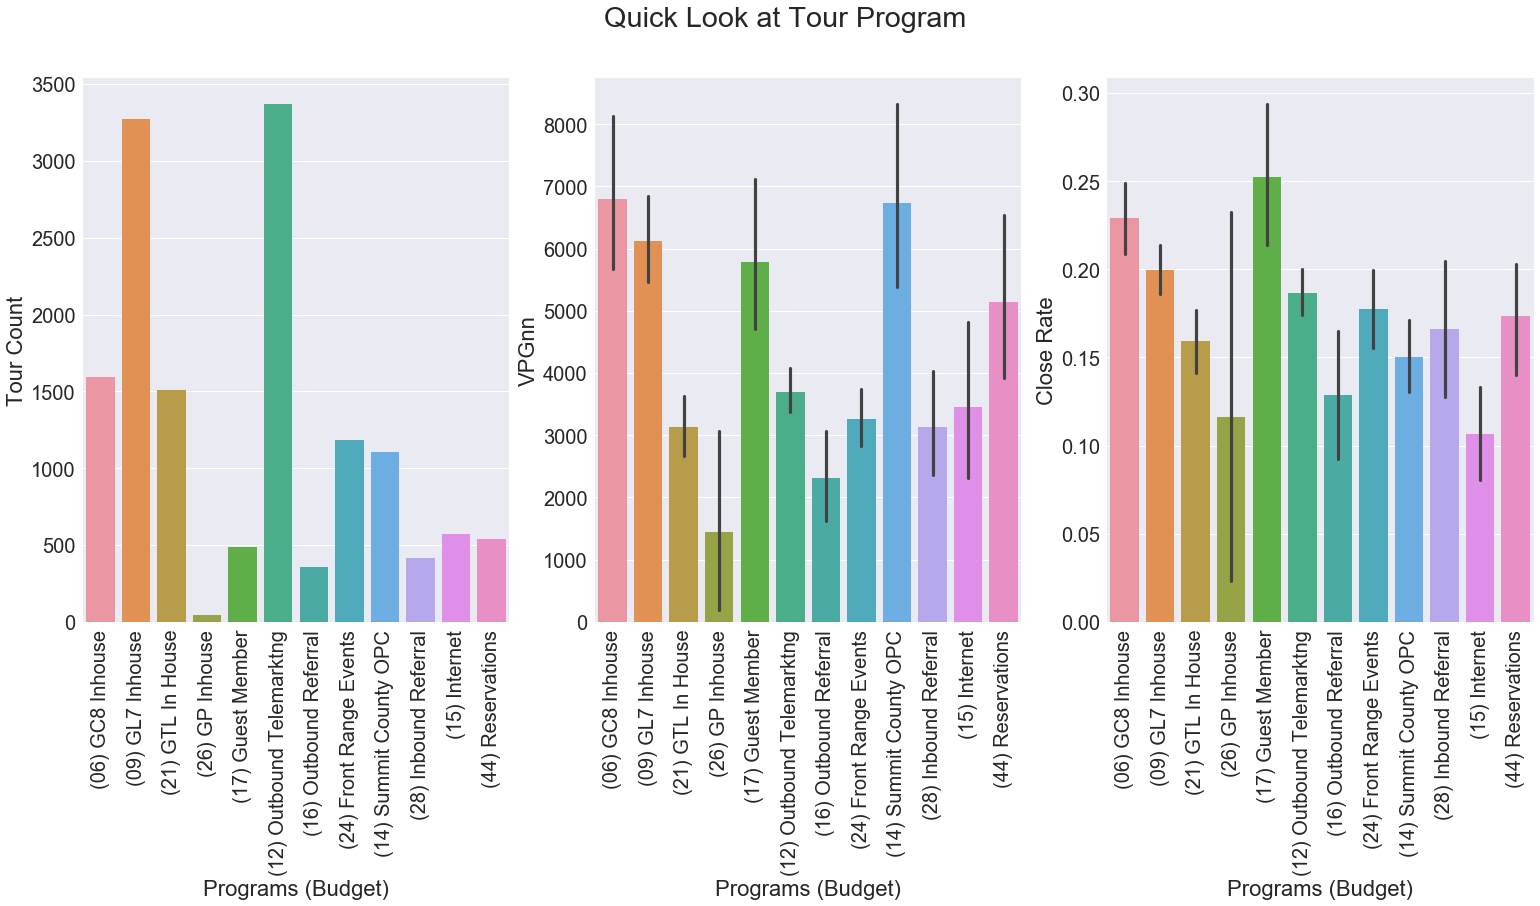

Inhouse programs  vs Non inhouse programs difference in vpg
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 427.497 : 2590.805 )

Inhouse programs  vs Non inhouse programs difference in Close Rate
***The Groups Have Different Means***
Probablility They Have Same Mean:  0.0
Range of True Difference in Means: ( 0.007 : 0.057 )

---------------------------------------------------------------------


In [12]:
plt.subplot(1,3,1)
sns.countplot(x= 'Programs (Budget)', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'Programs (Budget)', y = 'ResultOfTour', data = df, order = ['(06) GC8 Inhouse','(09) GL7 Inhouse','(21) GTL In House','(26) GP Inhouse','(17) Guest Member','(12) Outbound Telemarktng','(16) Outbound Referral','(24) Front Range Events','(14) Summit County OPC','(28) Inbound Referral','(15) Internet','(44) Reservations'])
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Tour Program')
plt.show()

#Inhouse programs  vs Non inhouse differnce in vpg z test
dfInhouse = df[(df['Programs (Budget)']=='(06) GC8 Inhouse')|(df['Programs (Budget)']=='(21) GTL In House')|(df['Programs (Budget)']=='(26) GP Inhouse')|(df['Programs (Budget)']=='(09) GL7 Inhouse')|(df['Programs (Budget)']=='(17) Guest Member')]
dfNotInhouse = df[(df['Programs (Budget)']=='(12) Outbound Telemarktng')|(df['Programs (Budget)']=='(16) Outbound Referral')|(df['Programs (Budget)']=='(24) Front Range Events')|(df['Programs (Budget)']=='(14) Summit County OPC')|(df['Programs (Budget)']=='(28) Inbound Referral')|(df['Programs (Budget)']=='(15) Internet')|(df['Programs (Budget)']=='(44) Reservations')]

print('Inhouse programs  vs Non inhouse programs difference in vpg')
zTest(df,dfInhouse,dfNotInhouse, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Inhouse programs  vs Non inhouse programs difference in Close Rate')
zTest(df,dfInhouse,dfNotInhouse, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

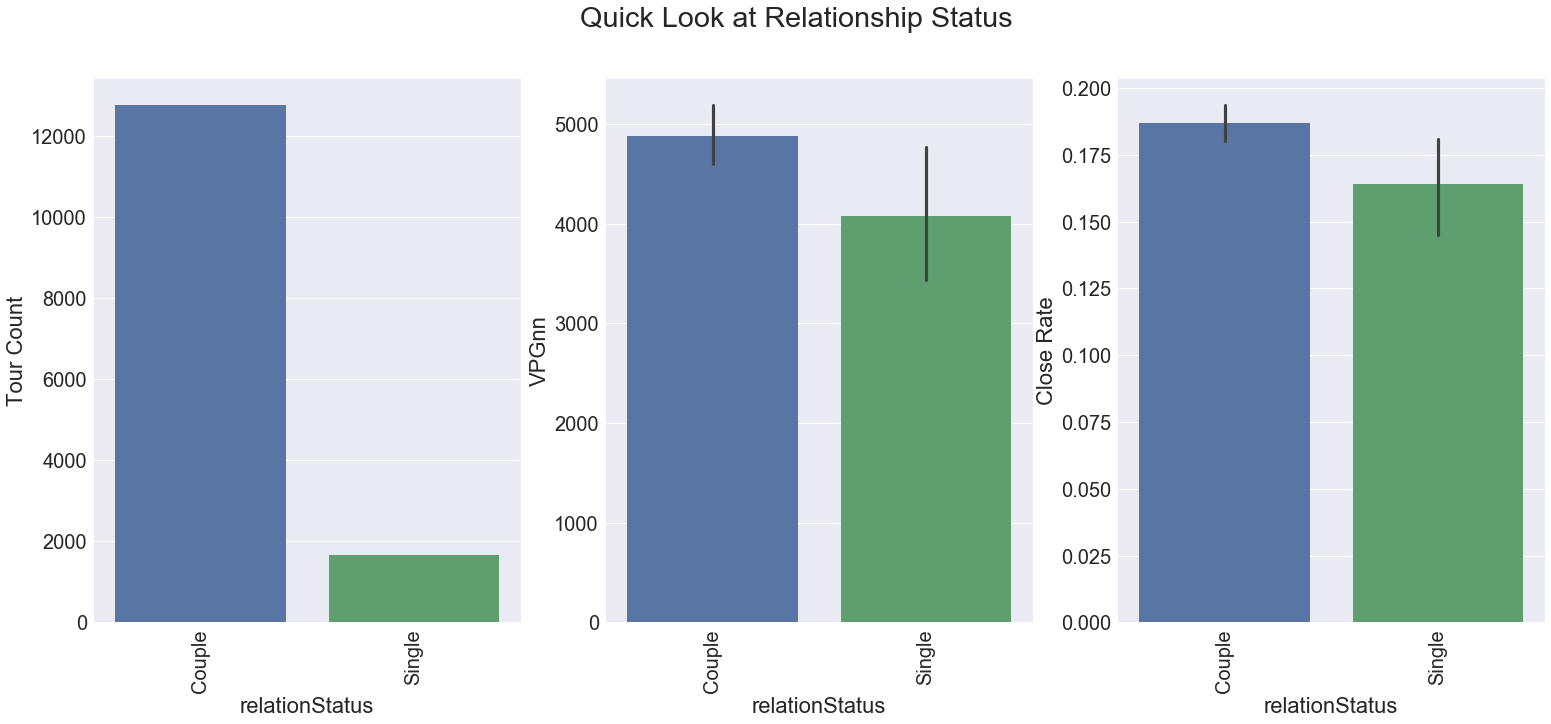

Couples Versus Singles Difference in VPG
Probablility They Have Same Mean:  0.06404
Range of True Difference in Means: ( -889.472 : 2504.508 )

Couples Versus Singles Difference in Close Rate
Probablility They Have Same Mean:  0.02465
Range of True Difference in Means: ( -0.017 : 0.062 )

---------------------------------------------------------------------


In [13]:
# relationship status quick look
plt.subplot(1,3,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,3,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.subplot(1,3,3)
sns.barplot(x= 'relationStatus', y= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Close Rate')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

print('Couples Versus Singles Difference in VPG')
zTest(df,dfCouple,dfSingle, 'NetVolumePlusNonGoodVolume', alpha)
print()
print('Couples Versus Singles Difference in Close Rate')
zTest(df,dfCouple,dfSingle, 'ResultOfTour', alpha)
print()
print('---------------------------------------------------------------------')

In [14]:
print(df.columns)

Index(['Age', 'AgentLine', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus', 'ResultOfTour', 'NetVolumePlusNonGoodVolume', 'gen'],
      dtype='object')


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split


dfX = df.drop(['ResultOfTour',  'AgentLine', 'NetVolumePlusNonGoodVolume', 'gen'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(dfX, df['ResultOfTour'], stratify=df['ResultOfTour'], test_size=0.25,)

dfX = pd.get_dummies(X_train, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
X_test = pd.get_dummies(X_test, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])

dfX2 = dfX


dfY = y_train
resample = TomekLinks(random_state=42)
dfX1, dfY1 = resample.fit_sample(dfX, dfY.astype(int))
dfX1= pd.DataFrame(dfX1, columns = dfX2.columns)
dfY1= pd.DataFrame(dfY1)

print(dfX1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 35 columns):
Age                                            10534 non-null int64
BookingWindow_Inside 2 Days                    10534 non-null int64
BookingWindow_Inside 90 days                   10534 non-null int64
BookingWindow_Inside Half Year                 10534 non-null int64
BookingWindow_Inside Month                     10534 non-null int64
BookingWindow_Inside Week                      10534 non-null int64
BookingWindow_Inside Year                      10534 non-null int64
BookingWindow_Over a Year                      10534 non-null int64
FirstGenVsOwner_1st Gen                        10534 non-null int64
FirstGenVsOwner_Owner                          10534 non-null int64
HHIncomeRanges_150k to 199k                    10534 non-null int64
HHIncomeRanges_200k to 349k                    10534 non-null int64
HHIncomeRanges_350k to 500k                    10534 non-null int64
HHIncom

In [16]:
dfX2 = df.drop(['ResultOfTour',  'AgentLine', 'NetVolumePlusNonGoodVolume','gen'], axis = 1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dfX2, df['NetVolumePlusNonGoodVolume'], test_size=0.25)

dfX2 = pd.get_dummies(X_train2, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
X_test2 = pd.get_dummies(X_test2, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])


dfY2 = y_train2

print(dfX2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 360937 to 350539
Data columns (total 35 columns):
Age                                            10833 non-null int64
BookingWindow_Inside 2 Days                    10833 non-null uint8
BookingWindow_Inside 90 days                   10833 non-null uint8
BookingWindow_Inside Half Year                 10833 non-null uint8
BookingWindow_Inside Month                     10833 non-null uint8
BookingWindow_Inside Week                      10833 non-null uint8
BookingWindow_Inside Year                      10833 non-null uint8
BookingWindow_Over a Year                      10833 non-null uint8
FirstGenVsOwner_1st Gen                        10833 non-null uint8
FirstGenVsOwner_Owner                          10833 non-null uint8
HHIncomeRanges_150k to 199k                    10833 non-null uint8
HHIncomeRanges_200k to 349k                    10833 non-null uint8
HHIncomeRanges_350k to 500k                    10833 non-null uint8
H

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


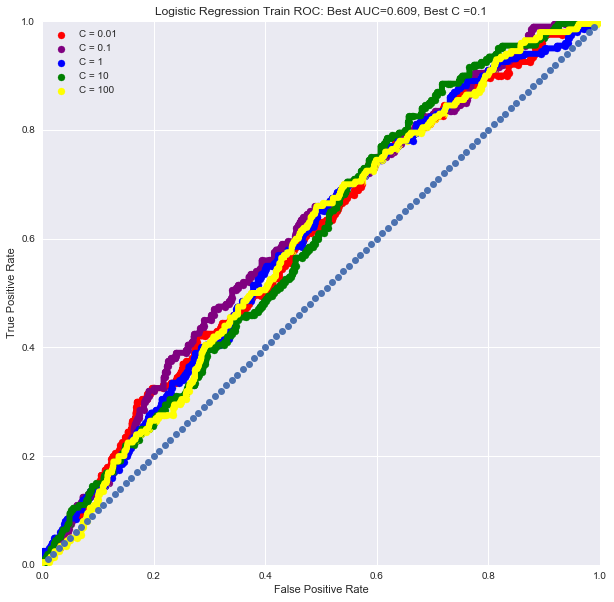

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import brier_score_loss

bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedShuffleSplit(n_splits=5, random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression Train ROC: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


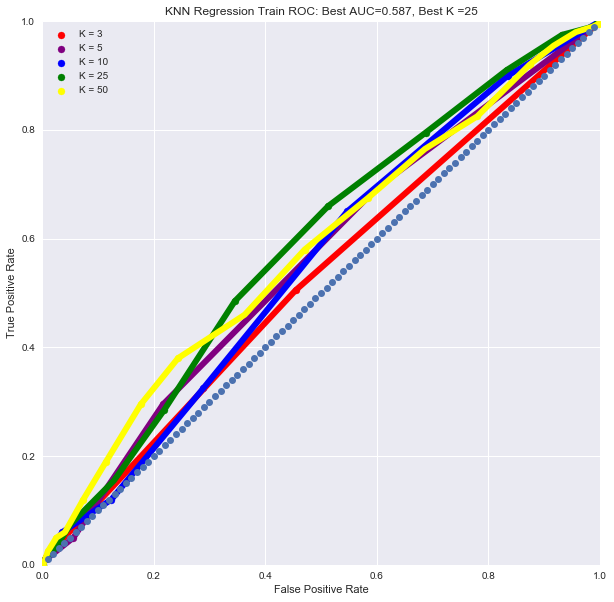

In [18]:
from sklearn.neighbors import KNeighborsClassifier


bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ks = [3,5,10,25,50]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    knn = KNeighborsClassifier(Ks[i])
    knn.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = knn.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=Ks[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\U

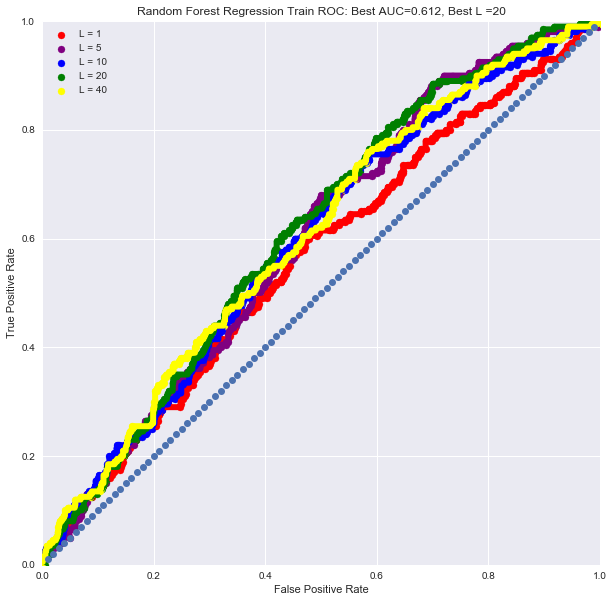

In [19]:
from sklearn.ensemble import RandomForestClassifier

bestL = 0
bestAUCL = 0
bestFeatureImportances= []
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ls = [1,5,10,20,40]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    rfr = RandomForestClassifier(n_estimators=1000,min_samples_leaf=Ls[i], random_state=42)
    rfr.fit(dfX1.iloc[train.tolist()],dfY1.iloc[train.tolist()])
    preds = rfr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCL:
        bestL=Ls[i]
        bestAUCL=auc
        bestFeatureImportances = rfr.feature_importances_
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='L = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Random Forest Regression Train ROC: Best AUC='+str(round(bestAUCL,3))+', Best L ='+str(bestL))
plt.plot(x,y,'o')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


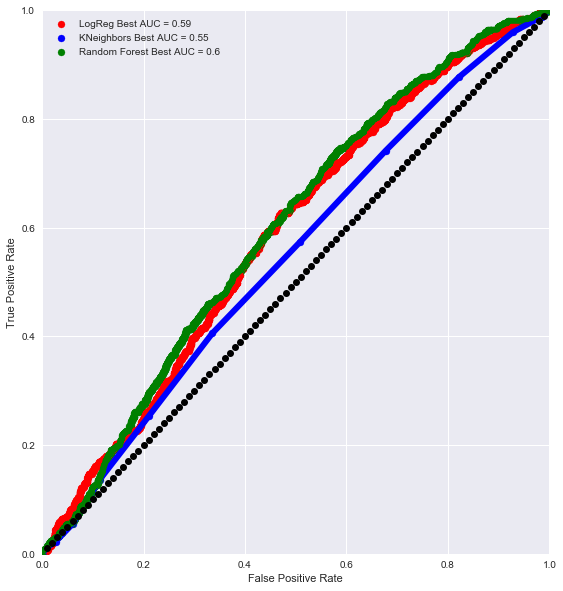

In [20]:
#logistic regregression best model 
lr = LogisticRegression(C=bestC, class_weight='balanced')
lr.fit(dfX1,dfY1)
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)    
auc = metrics.auc(fpr,tpr)
# change  figure size
mpl.rcParams['figure.figsize'] = (20,10)
sns.set()
#plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
plt.subplot(1,2,1)
plt.scatter(x=fpr, y=tpr, color = 'Red', label= 'LogReg Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Red',linewidth=6.0)


#knn best model 
knn = KNeighborsClassifier(bestK)
knn.fit(dfX1,dfY1)
preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Blue', label= 'KNeighbors Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Blue',linewidth=6.0)

#random forest best model 
clf = RandomForestClassifier(n_estimators=1000,min_samples_leaf =bestL,random_state=42, class_weight='balanced')
clf.fit(dfX1,dfY1)
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Green', label= 'Random Forest Best AUC = '+ str(round(auc,2)))
plt.plot(fpr,tpr,color= 'Green',linewidth=6.0)


plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.plot(x,y,'o', color='Black')
plt.show()

[0.14351105 0.12388131 0.299814   ... 0.26755182 0.20058818 0.12677828]
[0.08551943 0.20708022 0.27767054 ... 0.16094943 0.15761914 0.17542542]
[0.08530092 0.1697392  0.23153049 ... 0.2762513  0.0583468  0.13435033]
[0.23160687 0.15604656 0.20136931 ... 0.14106121 0.17110135 0.23906306]
[0.16088607 0.28091511 0.24299721 ... 0.25175742 0.19777571 0.15914668]


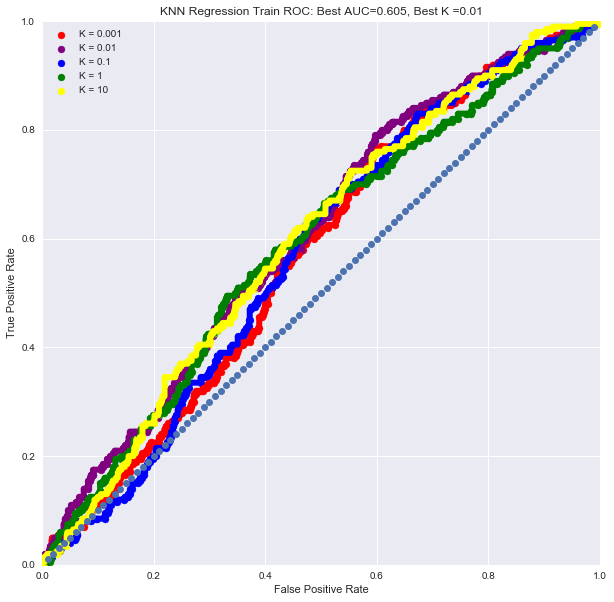

In [21]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge()

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,dfX2,dfY2, cv=5)

bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
As = [0.001,0.01,0.1,1,10]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    ridge = Ridge(alpha=As[i], normalize=False)
    ridge.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = ridge.predict(dfX.iloc[test.tolist()])
    print(preds)
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=As[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(As[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
bestLR =0
bestAUCRFR=0
i=0
#make cross validation of K values and kfold
Ls = [1,5,10,20,40]
kf = KFold(5)




for train, test in kf.split(dfX2,dfY2):
    rfr = RandomForestRegressor(n_estimators=100,min_samples_leaf=Ls[i])
    rfr.fit(dfX2.iloc[train.tolist()],dfY2.iloc[train.tolist()])
    preds = rfr.predict(dfX2.iloc[test.tolist()])
    print(max(preds))
    print(rfr.score(dfX2.iloc[test.tolist()],dfY2.iloc[test.tolist()]))
    i += 1 
    


189873.76333333337
-0.7229120703860501
81356.60843095515
0.06687330640958977
60985.98856042652
0.03072101643358249
46930.31326558823
0.04408070582020951
29308.446152604087
0.07908604345275705


In [23]:
import tabpy_client
# Connect to TabPy server using the client library
connection = tabpy_client.Client('http://localhost:9004/')

In [24]:
# tabpy code for is Buyer


model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
model.fit(dfX1,dfY1)


def isBuyer(Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus]), columns =['Age', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    X.Age =X.Age.astype(int)
    
    X = pd.get_dummies(X, columns = None ,prefix=[ 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    
    missing_cols = set( dfX2.columns ) - set( X.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    X = X[dfX2.columns]
    
    
    print('Probability of Buying:')
    return str(model.predict_proba(X)[:,1])


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [25]:
# tabpy code for isWorth


model2 = RandomForestRegressor(n_estimators=1000,min_samples_leaf=bestL)
model2.fit(dfX2,dfY2)



def isWorth(Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus]), columns =['Age', 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    X.Age =X.Age.astype(int)
    
    X = pd.get_dummies(X, columns = None ,prefix=[ 'BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
    
    missing_cols = set( dfX2.columns ) - set( X.columns )
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        X[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    X = X[dfX2.columns]
    
    print('Amount Would Buy:')
    return str(model2.predict(X))


In [26]:
#            Age, Bookingwindow, Ownvs1st,      HHI,  Homeowner,   Instate,           Program,    RelationStatus
#              |         |           |           |        |          |                  |              |
print(isBuyer(45,'Inside 2 Days', 'Owner', 'Over 500k', 'Yes', 'Out of State', '(17) Guest Member', 'Couple'))
print()
print(isWorth(45,'Inside 2 Days', 'Owner', 'Over 500k', 'Yes', 'Out of State', '(17) Guest Member', 'Couple'))

Probability of Buying:
[0.29964737]

Amount Would Buy:
[20002.94066428]


In [27]:
# Publish the isBuyer function to TabPy server so it can be used from Tableau
# Using the name DiagnosticsDemo and a short description of what it does
connection.deploy('BuyerPrediction',
                  isBuyer,
                  'Returns prediction of buying based on random forest classifier model trained using clean data from 12/1/16-2/28/2018')

ConnectionError: HTTPConnectionPool(host='localhost', port=9004): Max retries exceeded with url: /endpoints (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000022CB26CCC50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [ ]:
from sklearn.feature_selection import RFE
i=0
bestF =0
bestAUCF =0
bestMask =[]

Fs = [9,8,7,6,5]


for train, test in kf.split(dfX1,dfY1):
    model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=bestL)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(dfX1.iloc[train.tolist()], dfY1.iloc[train.tolist()])
    preds = rfe.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCF:
        bestF=Fs[i]
        bestAUCF=auc
        bestMask = list(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns[rfe.support_])
        plt.title('Recursive Feature Elimination: Best Number of Features is ' + str(len(bestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'Random Forest RFE ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.plot(x,y,'o')
plt.show()

print('Selected Features: ',bestMask)
print()
print('Not Selected Features:',listDiff(df.drop(['NetVolumePlusNonGoodVolume','ResultOfTour'], axis=1).columns.tolist(),bestMask))